# Tutorial de Processamento Digital de Imagens com Python 3 e OpenCV

Tutorial criado com base no livro **Introdução à Visão Computacional** de André Backes e Jarbas Sá Junior
### Requisitos:
- Python 3.7 ou mais recente
- OpenCV 4.0 ou mais recente
- Numpy 1.18 ou mais recente
- Matplotlib 3.3 ou mais recente

In [56]:
# Importanto bibliotecas necessárias
import os

import cv2
import numpy as np
from matplotlib import pyplot as plt

### Lendo imagens
Usaremos o OpenCV para ler imagens e realizar operações com elas

In [69]:
path = os.path.join('files', 'nasa2.png') 
img = cv2.imread(path) # Abre o arquivo de imagem e salva na variável IMG

Uma imagem lida pelo OpenCV nada mais é que um *array* de *arrays* do Numpy, Ou seja, uma matriz. Isso nos dá algumas informações interessantes intrínsecas ao Numpy. Um exemplo é o *shape* que nos diz quantas linhas, colunas e canais tem uma imagem.

In [58]:
img.shape

(560, 1000, 3)

A imagem possui 560 de altura por 1000 de comprimento, em 3 canais. Agora vamos visualizá-la.

O OpenCV possui uma função para visualizar imagens é a ```cv2.imshow()```. Entretanto, esta cria uma nova janela, por fins didáticos usaremos o Pyplot do Matplotlib para visualizar as imagens no output da célula.

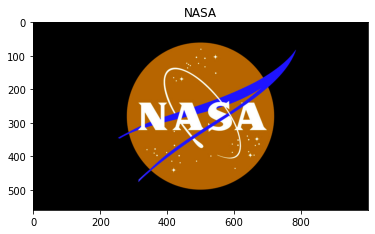

In [59]:
plt.imshow(img)
plt.title("NASA")
plt.show()

Algo de errado não está certo! O símbolo da NASA não possui essas cores! Isso ocorre, pois o OpenCV implementa seu padrão de imagens coloridas na ordem reversa. O costume que temos é de pensar sempre da seguinte forma:

Uma imagem colorida possui 3 canais, R representando a quantidade de vermelho, G para a quantidade de verde e B para a quantidade de azul. Entretanto o OpenCV utiliza o padrão **BGR**. Ou seja, a primeira e a terceira colunas estão invertidas. De qualquer forma, temos uma solução fácil para isso, vejamos abaixo:

In [70]:
# A função cvtColor converte uma imagem de uma padrão de cores para outro de acordo com a flag
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

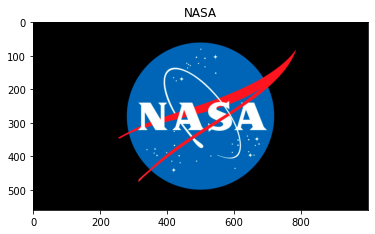

In [61]:
# Visualizando novamente
plt.imshow(img)
plt.title("NASA")
plt.show()

Problema resolvido!

Utilizando essa mesma função ```cv2.cvtColor()``` podemos transformar uma imagem em alguns outros padrões muito comuns, por exemplo a **escala de cinza** 

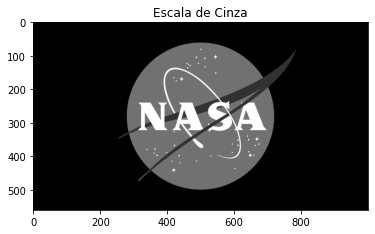

In [9]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.title("Escala de Cinza")
plt.show()

Como podemos ver abaixo, a imagem que antes possuía 3 canais, agora tornou-se uma matriz 2D, com um único canal.

In [10]:
gray.shape

(560, 1000)

Utilizando essa imagem em escala de cinza, podemos criar imagens binárias, onde cada pixel só pode ser 0 ou 1

In [21]:
binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)[1]
binary

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

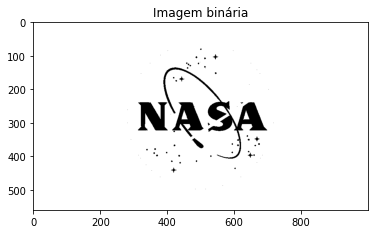

In [25]:
plt.imshow(binary, cmap="binary")
plt.title("Imagem binária")
plt.show()

Na imagem acima, todos os pontos maiores que 127 tornaram-se 1 e todos os menores 0. Podemos alterar este limiar de 127, por exemplo

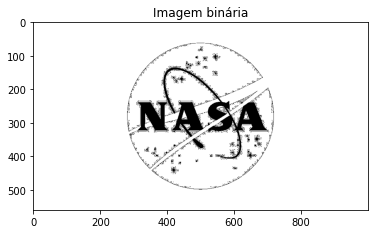

In [32]:
binary = cv2.threshold(gray, 115, 255, cv2.THRESH_BINARY)[1]
plt.imshow(binary, cmap="binary")
plt.title("Imagem binária")
plt.show()

Podemos acessar e manipular os pixels da imagem diretamente

In [62]:
(b,g,r) = img[200,500]
print("Canal azul:", b)
print("Canal verde:", g)
print("Canal vermelho:", r)

Canal azul: 0
Canal verde: 101
Canal vermelho: 183


Desenhando pontos vermelhos na imagem

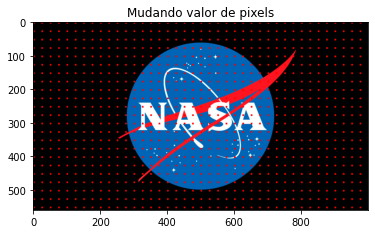

In [72]:
new_img = img.copy()
for y in range(0, img.shape[0], 25):
    for x in range(0, img.shape[1], 25):
        new_img[y:y+5, x: x+5] = (255,0,0)
        
plt.imshow(new_img)
plt.title("Mudando valor de pixels")
plt.show()

Também podemos alterar fatias inteiras da imagem utilizando o slicing de listas do python

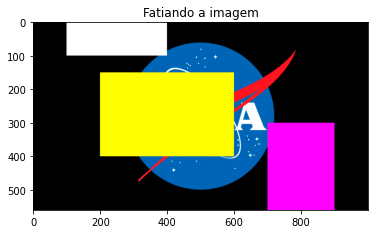

In [81]:
slice_img = img.copy()
slice_img[0:100,100:400] = (255, 255, 255) # Retângulo branco
slice_img[300:800,700:900] = (255, 0, 255) # Retângulo rosa
slice_img[150:400,200:600] = (255, 255, 0) # Retângulo amarelo

plt.imshow(slice_img)
plt.title("Fatiando a imagem")
plt.show()